In [22]:
# the fun bit, looking at the data, making visualizations, finding longest/shortest words by travel distance
import pandas as pd
pd.options.mode.chained_assignment = None

df = pd.read_csv('word_distances.csv', keep_default_na = False)
layouts = ['qwerty', 'dvorak', 'colemak', 'workman']
print(df.head())

    words  length  qwerty  dvorak  colemak  workman  qwerty_home  dvorak_home  \
0      AA       2    0.00    0.00     0.00     0.00       100.00       100.00   
1     AAA       3    0.00    0.00     0.00     0.00       100.00       100.00   
2     AAH       3   95.25  114.30    95.25    38.10        66.67       100.00   
3   AAHED       5  179.67  247.65   190.50   253.93        60.00        80.00   
4  AAHING       6  212.92  275.51   237.41   266.70        33.33        66.67   

   colemak_home  workman_home  
0        100.00        100.00  
1        100.00        100.00  
2         66.67        100.00  
3         60.00         80.00  
4         66.67         83.33  


In [23]:
#distance per letter for each word
df['qw_dpl'] = round(df['qwerty'] / df['length'], 3)
df['dv_dpl'] = round(df['dvorak'] / df['length'], 3)
df['co_dpl'] = round(df['colemak'] / df['length'], 3)
df['wo_dpl'] = round(df['workman'] / df['length'], 3)

#distance per jump for each word
df['qw_dpj'] = round(df['qwerty'] / (df['length']-1), 3)
df['dv_dpj'] = round(df['dvorak'] / (df['length']-1), 3)
df['co_dpj'] = round(df['colemak'] / (df['length']-1), 3)
df['wo_dpj'] = round(df['workman'] / (df['length']-1), 3)

print(df.head())

    words  length  qwerty  dvorak  colemak  workman  qwerty_home  dvorak_home  \
0      AA       2    0.00    0.00     0.00     0.00       100.00       100.00   
1     AAA       3    0.00    0.00     0.00     0.00       100.00       100.00   
2     AAH       3   95.25  114.30    95.25    38.10        66.67       100.00   
3   AAHED       5  179.67  247.65   190.50   253.93        60.00        80.00   
4  AAHING       6  212.92  275.51   237.41   266.70        33.33        66.67   

   colemak_home  workman_home  qw_dpl  dv_dpl  co_dpl  wo_dpl  qw_dpj  dv_dpj  \
0        100.00        100.00   0.000   0.000   0.000   0.000   0.000   0.000   
1        100.00        100.00   0.000   0.000   0.000   0.000   0.000   0.000   
2         66.67        100.00  31.750  38.100  31.750  12.700  47.625  57.150   
3         60.00         80.00  35.934  49.530  38.100  50.786  44.918  61.912   
4         66.67         83.33  35.487  45.918  39.568  44.450  42.584  55.102   

   co_dpj  wo_dpj  
0   0.

In [24]:
col_names = {}
for ly in layouts:
    cols = [ly, ly[:2]+'_dpl', ly[:2]+'_dpj']
    col_names.update({ly:cols})
    
print(col_names)

{'qwerty': ['qwerty', 'qw_dpl', 'qw_dpj'], 'dvorak': ['dvorak', 'dv_dpl', 'dv_dpj'], 'colemak': ['colemak', 'co_dpl', 'co_dpj'], 'workman': ['workman', 'wo_dpl', 'wo_dpj']}


In [4]:
#get top 20 for particular measure and save to csv
def analysis(measure, name):
    df_output = pd.DataFrame()
    df_output['rank'] = range(1, 21)
    for ly in layouts:
        cols_out = ['words'] + col_names[ly]
        df.sort_values(by=cols_out[measure], inplace = True, ascending = False)
        df_new = df[cols_out].head(20)
        df_new.rename(columns = {'words':ly[:2]+'_words'}, inplace = True)
        df_new['rank'] = range(1,21)
        df_output = pd.merge(df_output, df_new, on='rank')
    filename = 'top20_' + name + '.csv'
    df_output.to_csv(filename, index = False)

In [5]:
names = ['length', 'dpl', 'dpj']
for i, val in enumerate(names):
    analysis(i+1, val)

In [25]:
df = df[df['dvorak'] > 0]
print(df.head())

    words  length  qwerty  dvorak  colemak  workman  qwerty_home  dvorak_home  \
2     AAH       3   95.25  114.30    95.25    38.10        66.67       100.00   
3   AAHED       5  179.67  247.65   190.50   253.93        60.00        80.00   
4  AAHING       6  212.92  275.51   237.41   266.70        33.33        66.67   
5    AAHS       4  171.45  171.45   152.40    57.15        75.00       100.00   
6     AAL       3  152.40  167.77   111.18   125.28       100.00        66.67   

   colemak_home  workman_home  qw_dpl  dv_dpl  co_dpl  wo_dpl  qw_dpj  dv_dpj  \
2         66.67        100.00  31.750  38.100  31.750  12.700  47.625  57.150   
3         60.00         80.00  35.934  49.530  38.100  50.786  44.918  61.912   
4         66.67         83.33  35.487  45.918  39.568  44.450  42.584  55.102   
5         75.00        100.00  42.862  42.862  38.100  14.288  57.150  57.150   
6         66.67         66.67  50.800  55.923  37.060  41.760  76.200  83.885   

   co_dpj  wo_dpj  
2  47.

In [35]:
def shortest(length):
    df_subset = df[df['length'] == length]
    df_add = pd.DataFrame()
    df_add['rank'] = range(1, 16)
    df_add['length'] = length
    for ly in layouts:
        cols_out = ['words'] + col_names[ly]
        df_subset.sort_values(by=cols_out[1], inplace = True, ascending = True)
        df_new = df_subset[cols_out].head(15)
        df_new.rename(columns = {'words':ly[:2]+'words'}, inplace = True)
        df_new['rank'] = range(1,16)
        df_add = pd.merge(df_add, df_new, on='rank')
    return df_add

In [37]:
df_shortest = pd.DataFrame()
for i in range(3, 11):
    df_n = shortest(i)
    df_shortest = df_shortest.append(df_n, ignore_index = True)
df_shortest.to_csv('shortest.csv', index = False)

In [ ]:
'''Below this point is still in progress'''





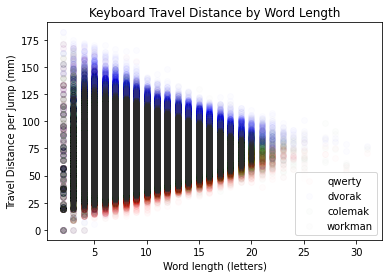

In [22]:
import matplotlib.pyplot as plt

plt.scatter(df['length'], df['qw_dpj'], color = 'red', alpha = 0.01, label = 'qwerty')
plt.scatter(df['length'], df['dv_dpj'], color = 'blue', alpha = 0.01, label = 'dvorak')
plt.scatter(df['length'], df['co_dpj'], color = 'green', alpha = 0.01, label = 'colemak')
plt.scatter(df['length'], df['wo_dpj'], color = 'gray', alpha = 0.01, label = 'workman')


plt.xlabel('Word length (letters)')
plt.ylabel('Travel Distance per Jump (mm)')

plt.legend(loc = 'lower right')
plt.title('Keyboard Travel Distance by Word Length')

plt.show()

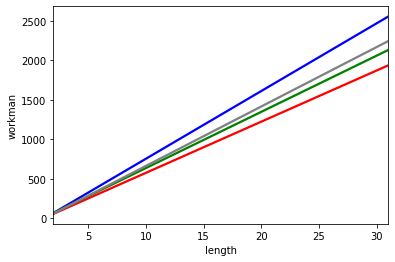

In [37]:
import seaborn as sns

sns.regplot(x='length', y='dvorak', data=df, color='blue', scatter=None)
sns.regplot(x='length', y='qwerty', data=df, color='red', scatter=None)
sns.regplot(x='length', y='colemak', data=df, color='green', scatter=None)
sns.regplot(x='length', y='workman', data=df, color='gray', scatter=None)

plt.show()

In [43]:
df.describe()

,length,qwerty,dvorak,colemak,workman,qw_dpl,dv_dpl,cl_dpl,wk_dpl,qw_dpj,dv_dpj,cl_dpj,wk_dpj
count,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000
mean,9.443435,540.471413,707.077586,597.542731,622.092560,56.459074,73.708418,62.388329,64.818133,64.000535,83.503368,70.700027,73.426031
std,2.915340,219.972870,281.827110,239.964927,254.332937,12.841879,15.203724,13.592962,14.543855,14.575114,16.975119,15.267430,16.225446
min,2.000000,19.050000,19.050000,19.050000,19.050000,6.350000,4.260000,4.762000,6.350000,9.525000,5.325000,6.350000,9.525000
25%,7.000000,380.540000,503.670000,421.350000,436.180000,47.867000,63.851000,53.322000,55.191000,54.269000,72.398000,60.421500,62.590000
50%,9.000000,517.100000,679.610000,573.600000,595.970000,56.345000,74.127000,62.316000,64.611000,63.367000,83.315000,70.143000,72.732000
75%,11.000000,676.540000,882.710000,749.400000,782.560000,64.783000,83.953000,71.403000,74.273000,72.864000,94.298000,80.375000,83.581000
max,31.000000,2119.490000,2427.090000,2558.520000,2390.000000,139.114000,147.436000,127.073000,132.145000,171.450000,181.970000,171.450000,177.240000
